<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Exercise25_NTTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info>=(3,5)
import numpy as np
import pandas as pd
import os
import random
import networkx as nx
np.random.seed(42)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

import warnings
warnings.filterwarnings(action="ignore",message="^internal gesld")
PROJECT_ROOT_DIR=" "
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR,"images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_first(fig_id,tight_layout=True,fig_extension="png",resolution=300):
  path=os.path.join(IMAGES_PATH,fig_id + "," + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
# Create a grid with random colors
def create_grid(size):
    colors = ['R', 'B', 'Y', 'G']
    return np.random.choice(colors, (size, size))


In [ ]:
# Simulate random motion of cells
def simulate_motion(grid):
    new_grid = grid.copy()
    size = grid.shape[0]

    for i in range(size):
        for j in range(size):
            if grid[i, j] != ' ':
                new_i, new_j = i, j
                while new_i == i and new_j == j:
                    new_i = i + random.choice([-1, 0, 1])
                    new_j = j + random.choice([-1, 0, 1])
                    if new_i < 0 or new_i >= size or new_j < 0 or new_j >= size:
                        new_i, new_j = i, j

                    # Stop motion if cell contacts same color
                    if new_grid[new_i, new_j] == grid[i, j]:
                        break

                new_grid[new_i, new_j] = grid[i, j]
                new_grid[i, j] = ' '

    return new_grid



In [ ]:
# Visualize the grid
def plot_grid(grid):
    colors = {'R': 'red', 'B': 'blue', 'Y': 'yellow', 'G': 'green'}
    size = grid.shape[0]
    plt.figure(figsize=(3,3))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    for i in range(size):
        for j in range(size):
            color = colors.get(grid[i, j], 'white')
            if color != 'white':
                plt.fill([i, i+1, i+1, i], [j, j, j+1, j+1], color=color)
    plt.xlim(0, size)
    plt.ylim(0, size)
    plt.show()

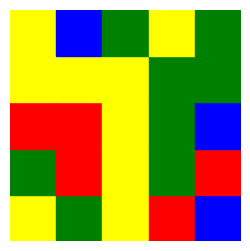

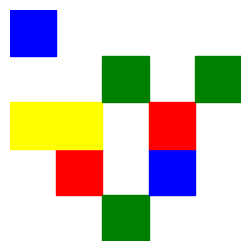

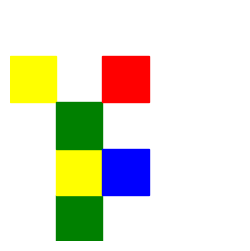

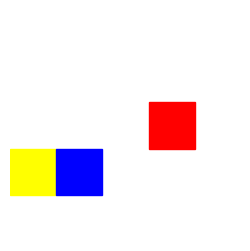

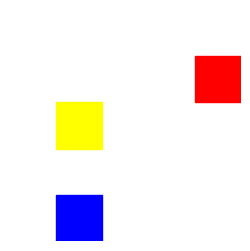

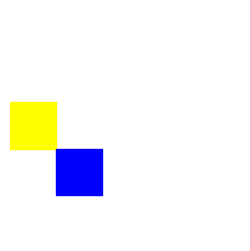

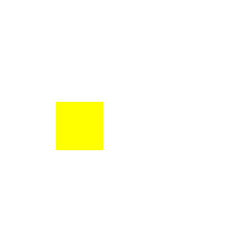

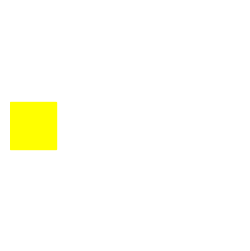

Cells have clustered!


In [ ]:
def main():
    size = 5
    grid = create_grid(size)

    while not np.all(grid[0, 0] == grid):
        plot_grid(grid)
        grid = simulate_motion(grid)

    print("Cells have clustered!")

if __name__ == "__main__":
    main()

In [ ]:
# Create a grid with random colors
def create_grid(size):
    colors = ['R', 'B', 'Y', 'G']
    return np.random.choice(colors, (size, size))

In [ ]:
# Simulate random motion of cells and form clusters
def simulate_clusters(grid):
    size = grid.shape[0]
    G = nx.Graph()
    for i in range(size):
        for j in range(size):
            if grid[i, j] != ' ':
                G.add_node((i, j))
    for i in range(size):
        for j in range(size):
            if grid[i, j] != ' ':
                current_node = (i, j)
                neighbors = [(i + dx, j + dy) for dx in [-1, 0, 1] for dy in [-1, 0, 1] if (dx != 0 or dy != 0)]
                neighbors = [(x, y) for x, y in neighbors if 0 <= x < size and 0 <= y < size and grid[x, y] == grid[i, j]]

                for neighbor in neighbors:
                    G.add_edge(current_node, neighbor)

    clusters = list(nx.connected_components(G))
    new_grid = np.full((size, size), ' ', dtype='U1')
    for cluster in clusters:
        color = grid[cluster.pop()]
        for node in cluster:
            new_grid[node] = color
    return new_grid

In [ ]:
# Visualize the grid
def plot_grid(grid):
    colors = {'R': 'red', 'B': 'blue', 'Y': 'yellow', 'G': 'green'}
    size = grid.shape[0]

    plt.figure(figsize=(3, 3))
    plt.gca().set_aspect('equal', adjustable='box')  # Set equal aspect ratio
    plt.axis('off')  # Turn off axis
    for i in range(size):
        for j in range(size):
            color = colors.get(grid[i, j], 'white')
            plt.fill([i, i+1, i+1, i], [j, j, j+1, j+1], color=color)

    plt.xlim(0, size)
    plt.ylim(0, size)
    plt.show()

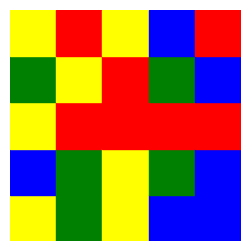

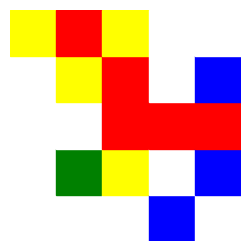

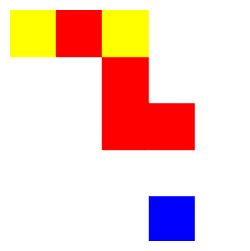

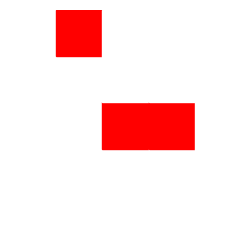

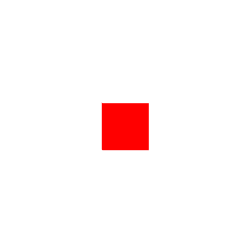

Cells have clustered!


In [ ]:
# Main simulation loop
def main():
    size = 5
    grid = create_grid(size)

    while not np.all(grid[0, 0] == grid):
        plot_grid(grid)
        grid = simulate_clusters(grid)

    print("Cells have clustered!")

if __name__ == "__main__":
    main()